In [42]:
# Data Preprocessing
import pandas as pd
import numpy as np
# Data Visualization
from pandas.plotting import scatter_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns  
# Encoding
from sklearn.preprocessing import LabelEncoder
# Warnings
import warnings

warnings.filterwarnings("ignore")
pd.set_option('future.no_silent_downcasting', True)

# 1. Data Preprocessing 

In [43]:
df = pd.read_excel("titanic3.xls")

In [44]:
df.head(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"


In [45]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


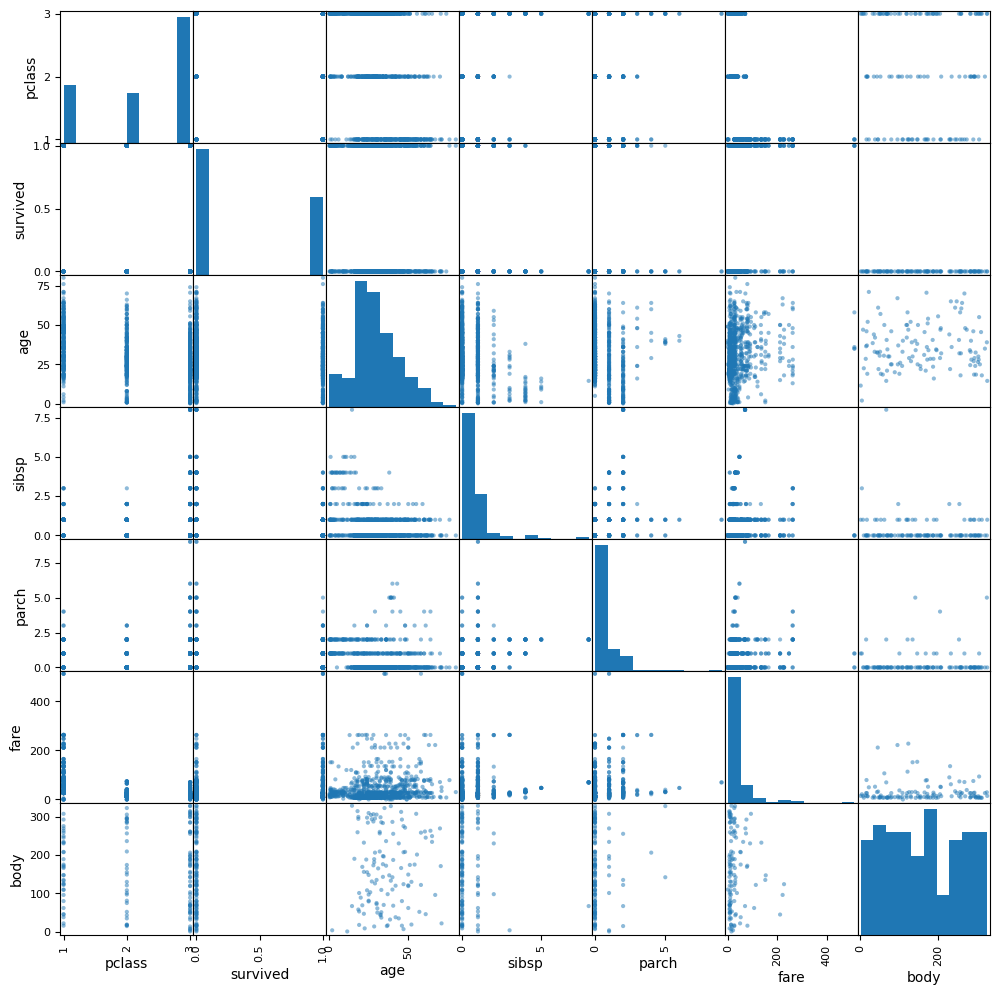

In [46]:
scatter_matrix(df, figsize=(12, 12))
plt.show()

In [47]:
print(df.shape)

(1309, 14)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [49]:
df["pclass"].nunique()

3

# 2. Feature Engineering

In [50]:
df["FamilySize"] = df['sibsp'] + df['parch']

In [51]:
bins_age = [0, 20, 30, 40, 50, 150]
labels_age =  ['<20','20-30','30-40','40-50','>50']

df["AgeCategory"] = pd.cut(df['age'],
                           bins=bins_age,
                           labels=labels_age,
                           include_lowest=True)

In [52]:
df['TravelAlone'] = np.where((df['sibsp'] + df['parch']) > 0, 0, 1).astype('uint8')

In [53]:
df["FareCategory"] = pd.qcut(df['fare'],
                             q=4,
                             labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [54]:
df['CabinKnown'] = ~df['cabin'].isnull()

In [55]:
df.drop(columns=['cabin'], inplace=True)

In [56]:
df.head(4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,FamilySize,AgeCategory,TravelAlone,FareCategory,CabinKnown
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,NaN,"St Louis, MO",0,20-30,1,Q4,True
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",3,<20,0,Q4,True
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,<20,0,Q4,True
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,20-30,0,Q4,True


In [57]:
df.isna().sum()

pclass             0
survived           0
name               0
sex                0
age              263
sibsp              0
parch              0
ticket             0
fare               1
embarked           2
boat             823
body            1188
home.dest        564
FamilySize         0
AgeCategory      263
TravelAlone        0
FareCategory       1
CabinKnown         0
dtype: int64

In [58]:
df['age'].fillna(df['age'].median(), inplace=True)

In [59]:
df['embarked'].fillna((df["embarked"].mode), inplace=True)

In [60]:
df.isna().sum()

pclass             0
survived           0
name               0
sex                0
age                0
sibsp              0
parch              0
ticket             0
fare               1
embarked           0
boat             823
body            1188
home.dest        564
FamilySize         0
AgeCategory      263
TravelAlone        0
FareCategory       1
CabinKnown         0
dtype: int64

In [61]:
df.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'embarked', 'boat', 'body', 'home.dest',
       'FamilySize', 'AgeCategory', 'TravelAlone', 'FareCategory',
       'CabinKnown'], dtype=object)

In [62]:
df["BodyKnown"] = ~df['body'].isnull()
df.drop(columns=["body"], inplace=True)

In [63]:
df["BoatFound"] = ~df['boat'].isnull()
df.drop(columns=['boat'], inplace=True)

In [64]:
categorical_columns = df.select_dtypes(include = ["object"])
df_onehot = pd.get_dummies(df, dtype="int")
df_onehot.head()

,pclass,survived,age,sibsp,parch,fare,FamilySize,TravelAlone,CabinKnown,BodyKnown,...,"home.dest_Zurich, Switzerland",AgeCategory_<20,AgeCategory_20-30,AgeCategory_30-40,AgeCategory_40-50,AgeCategory_>50,FareCategory_Q1,FareCategory_Q2,FareCategory_Q3,FareCategory_Q4
0,1,1,29.0000,0,0,211.3375,0,1,True,False,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0.9167,1,2,151.5500,3,0,True,False,...,0,1,0,0,0,0,0,0,0,1
2,1,0,2.0000,1,2,151.5500,3,0,True,False,...,0,1,0,0,0,0,0,0,0,1
3,1,0,30.0000,1,2,151.5500,3,0,True,True,...,0,0,1,0,0,0,0,0,0,1
4,1,0,25.0000,1,2,151.5500,3,0,True,False,...,0,0,1,0,0,0,0,0,0,1


In [65]:
df_onehot = df_onehot.replace({True: 1, False: 0}).infer_objects(copy = True)

In [66]:
categorical_columns = df_onehot.select_dtypes(include = ["object"])
categorical_columns.head()

""
0
1
2
3
4


In [67]:
df_onehot.head()

,pclass,survived,age,sibsp,parch,fare,FamilySize,TravelAlone,CabinKnown,BodyKnown,...,"home.dest_Zurich, Switzerland",AgeCategory_<20,AgeCategory_20-30,AgeCategory_30-40,AgeCategory_40-50,AgeCategory_>50,FareCategory_Q1,FareCategory_Q2,FareCategory_Q3,FareCategory_Q4
0,1,1,29.0000,0,0,211.3375,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0.9167,1,2,151.5500,3,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,2.0000,1,2,151.5500,3,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,30.0000,1,2,151.5500,3,0,1,1,...,0,0,1,0,0,0,0,0,0,1
4,1,0,25.0000,1,2,151.5500,3,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [68]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 2641 entries, pclass to FareCategory_Q4
dtypes: float64(2), int32(2630), int64(8), uint8(1)
memory usage: 13.2 MB


In [69]:
corr_matrix = df_onehot.corr()
print(corr_matrix['survived'].sort_values(ascending=False))

survived           1.000000
BoatFound          0.948190
sex_female         0.528693
CabinKnown         0.302250
fare               0.244265
                     ...   
FareCategory_Q1   -0.186006
TravelAlone       -0.201719
BodyKnown         -0.250897
pclass            -0.312469
sex_male          -0.528693
Name: survived, Length: 2641, dtype: float64


In [70]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [71]:
trans_MM = MinMaxScaler()
trans_SS = StandardScaler()

In [72]:
# df_MM = trans_SS.fit_transform()